In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("ks-projects-201801.csv",index_col="ID")

# 使わない列を削除
data = data.drop(['pledged','usd pledged','usd_pledged_real','usd_goal_real','backers'],axis=1)

In [50]:
data.head(20)

,name,category,main_category,currency,deadline,goal,launched,state,country
ID,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,US
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,successful,US
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,successful,US
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,failed,US
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,canceled,US


In [51]:
data.isnull().sum()

name             4
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
dtype: int64

In [52]:
# 欠損値処理
data["name"] = data["name"].fillna("nan")
data.isnull().sum()

name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
dtype: int64

In [53]:
# 日付のformat変更
data["deadline"] = pd.to_datetime(data["deadline"],format="%Y-%m-%d")
data["launched"] = pd.to_datetime(data["launched"],format="%Y-%m-%d %H:%M")

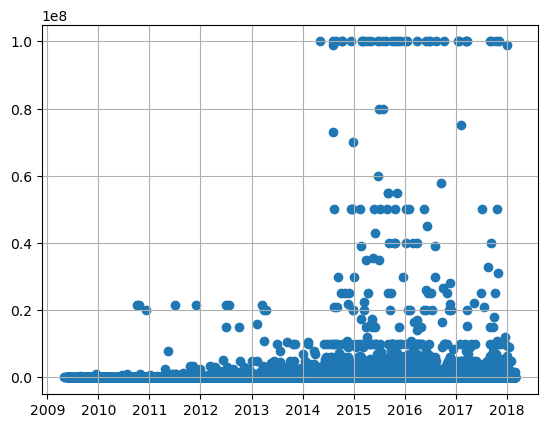

In [54]:
plt.scatter(data["deadline"],data["goal"])
plt.grid()

In [55]:
data["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [59]:
# stateのfailedを0に、そのほかを1に
data["state"] = [1 if s == "successful" else 0 for s in data["state"]]
data

,name,category,main_category,currency,deadline,goal,launched,state,country
ID,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,US
...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,0,US
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,0,US
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,0,US


In [60]:
data["state"].value_counts()

0    244705
1    133956
Name: state, dtype: int64

In [61]:
data_success = data[data["state"] == 1]
data_fail = data[data["state"] == 0]

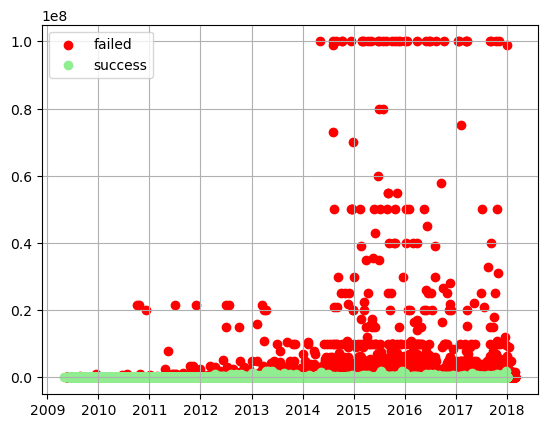

In [68]:
plt.scatter(data_fail["deadline"],data_fail["goal"],label="failed", c = "r")
plt.scatter(data_success["deadline"],data_success["goal"],label="success",c = "lightgreen")
plt.legend()
plt.grid()

In [69]:
data["period"] = data["deadline"] - data["launched"]

In [70]:
data

,name,category,main_category,currency,deadline,goal,launched,state,country,period
ID,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB,58 days 11:47:32
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US,59 days 19:16:03
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US,44 days 23:39:10
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US,29 days 20:35:49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,US,55 days 15:24:57
...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,0,US,29 days 21:24:30
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,0,US,26 days 20:24:46
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,0,US,45 days 04:19:30


In [77]:
data["period"].sort_values(ascending=False)

ID
69489148     16738 days 23:00:00
1014746686   14866 days 23:00:00
1245461087   14834 days 23:00:00
1480763647   14760 days 23:00:00
1384087152   14749 days 23:00:00
                     ...        
959890458        0 days 02:15:07
1334283643       0 days 01:48:40
1930411671       0 days 01:42:57
1916635516       0 days 00:51:07
1795728690       0 days 00:07:17
Name: period, Length: 378661, dtype: timedelta64[ns]